Dataset Shape: (303, 14)

Missing Values per Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing Values After Cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Categorical Columns: []


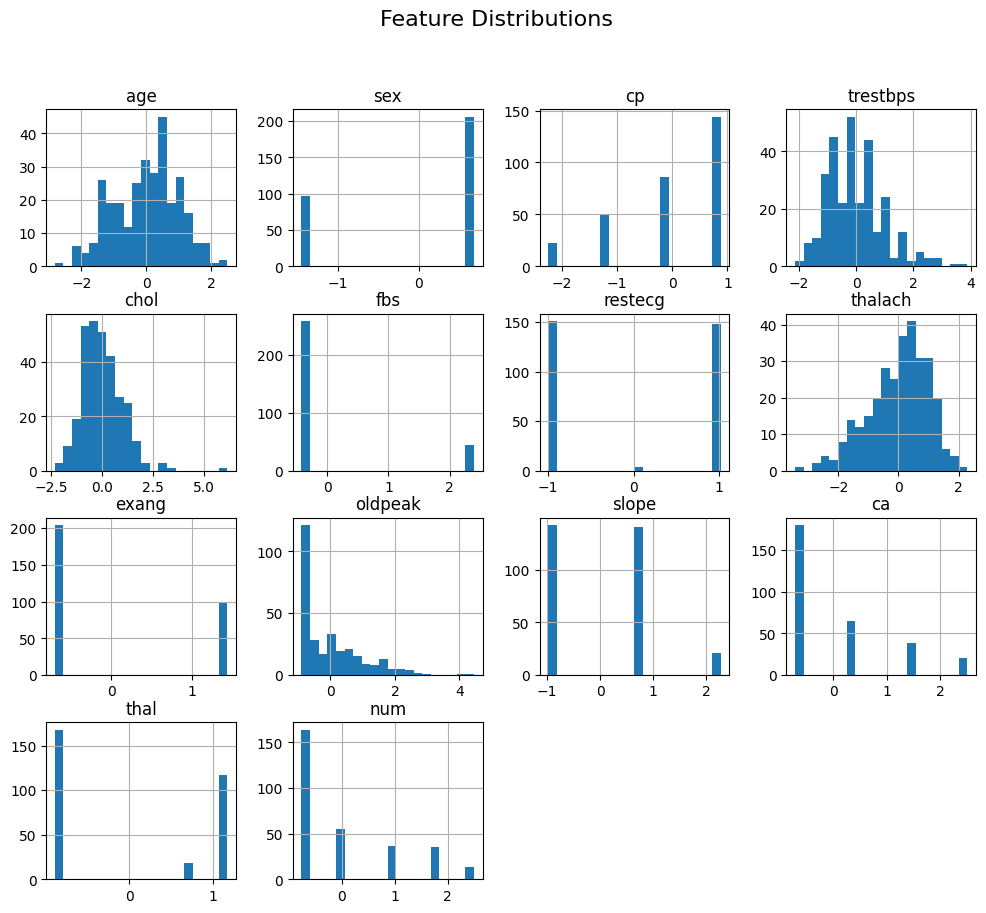

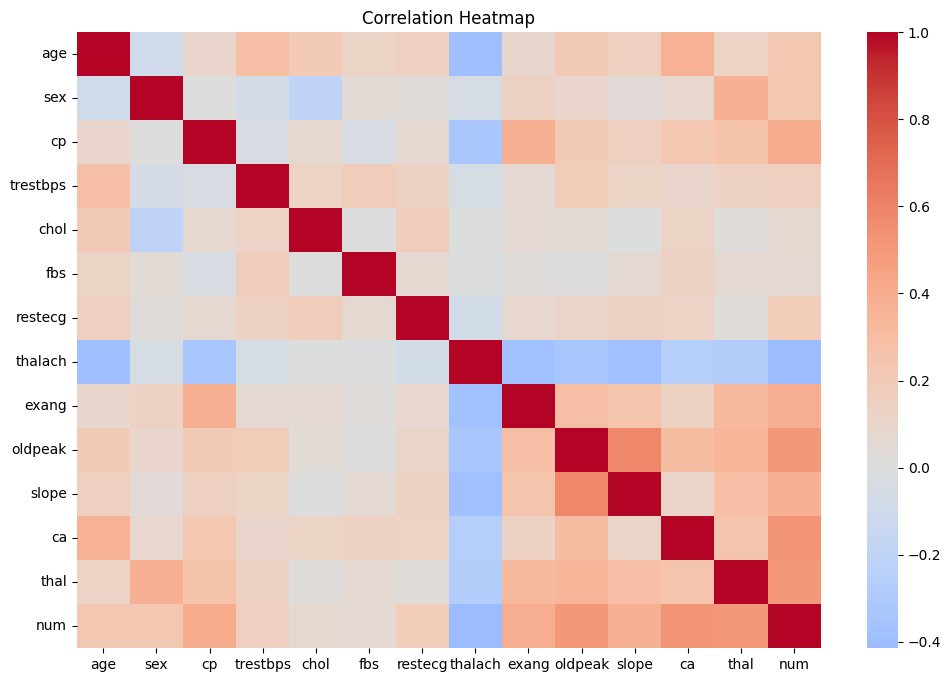

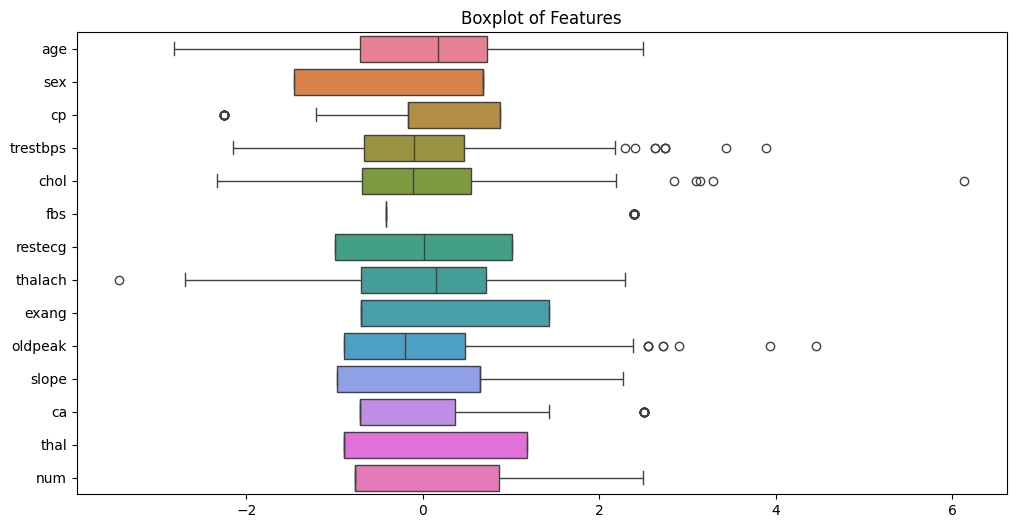


✅ Preprocessing Complete! Cleaned dataset saved as 'heart_disease_cleaned.csv'


In [1]:
# =========================
# 1. Install & Import Libraries
# =========================
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# =========================
# 2. Load Dataset from UCI Repo
# =========================
heart_disease = fetch_ucirepo(id=45)

# Features (X) and target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into one DataFrame for preprocessing
data = pd.concat([X, y], axis=1)

print("Dataset Shape:", data.shape)
data.head()

# =========================
# 3. Handle Missing Values
# =========================
print("\nMissing Values per Column:\n", data.isnull().sum())

# Fill missing numerical values with median
data = data.fillna(data.median(numeric_only=True))

print("\nMissing Values After Cleaning:\n", data.isnull().sum())

# =========================
# 4. Encode Categorical Features
# =========================
categorical_cols = data.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", list(categorical_cols))

# One-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# =========================
# 5. Scale Numerical Features
# =========================
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# =========================
# 6. Exploratory Data Analysis (EDA)
# =========================

# Histogram of features
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Features")
plt.show()

# =========================
# 7. Save Cleaned Dataset
# =========================
data.to_csv("heart_disease_cleaned.csv", index=False)
print("\n✅ Preprocessing Complete! Cleaned dataset saved as 'heart_disease_cleaned.csv'")


In [2]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
